<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre6/CTR02_Exercice6_5ter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
R = 8.314
Ea = 65700 # J/mol
T0 = 305 # K
Tj0 = 340.5 # K
cpc = 28 # kJ/kg/K
mdot = 500 # kg/h
CA0 = 1.86 # kmol/m3
FA0 = 16.3 * 0.9 # kmol/h
FAI = 16.3 * 0.1 # kmol/h
FB0 = 0 # kmol/h
Delta_HR = -34500 # kJ/kmol
cp_A = 141 # kJ/kmol*K
cp_B = 141 # kJ/kmol*K
cp_I = 161 # kJ/kmol*K
Ua = 5000 # kJ/m3*h*K
k1 = 31.1 # 1/h
Kc2 = 3.03 # -
T1 = 360 # K
T2 = 333 # K
cp_0 = cp_A + 0.1/0.9 * cp_I # J/mol*K
cocurrent = -1

In [0]:
def bilans(variables, V):
    FA, FB, T, Tj = variables
    
    k = k1 * np.exp(Ea/R * (1/T1 - 1/T))
    Kc = Kc2 * np.exp(Delta_HR/R * (1/T2 - 1/T))
    
    X = 1 - FA/FA0
    
    CA = CA0 * (1 - X)
    CB = CA0 * X
    
    r1 = k * CA
    r2 = k/Kc * CB
    
    RA = -r1 + r2
    RB = r1 - r2
    
    dFA = RA
    dFB = RB
    dT = (Ua * (Tj - T) + (-Delta_HR) * r1 + (Delta_HR) * r2) / FA0 / cp_0
    dTj = (cocurrent * Ua * (T - Tj)) / mdot / cpc
    
    return [dFA, dFB, dT, dTj]

In [0]:
conditions_initiales = [FA0, FB0, T0, Tj0]

In [0]:
V = np.arange(0, 5.01, 0.01)

In [0]:
results = odeint(
    bilans,
    conditions_initiales,
    V
)

In [0]:
FA = results[:,0]
FB = results[:,1]
T = results[:,2]
Tj = results[:,3]

X = 1 - FA / FA0

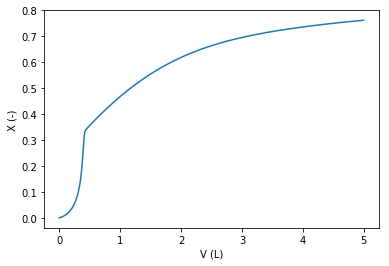

In [8]:
plt.plot(V, X)
plt.xlabel('V (L)')
plt.ylabel('X (-)')
plt.show()

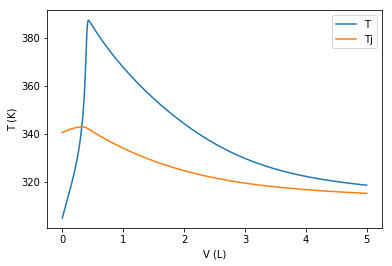

In [9]:
plt.plot(V, T)
plt.plot(V, Tj)
plt.xlabel('V (L)')
plt.ylabel('T (K)')
plt.legend(['T', 'Tj'])
plt.show()

In [10]:
Tj[-1]

315.22076390799907